In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import numpy as np
import time
import math

In [2]:
import surprise
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import Dataset
from surprise import evaluate, print_perf, GridSearch
from surprise import Reader
from surprise import accuracy

In [3]:
import ast
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, pairwise
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr
from collections import defaultdict

In [4]:
# load all ratings
ratings = pd.read_csv('../ratings_us.csv')

In [5]:
# load book meta data to get genres
books = pd.read_csv('../books.csv')
books2 = books[['book_id','title','authors']]

In [6]:
# load book meta data to get genres
book_meta = pd.read_csv('../books_meta_info.csv')
genres = book_meta[['book_id','Art', 'Biography',
       'Business', 'Chick Lit', "Children's", 'Christian', 'Classics',
       'Comics', 'Contemporary', 'Cookbooks', 'Crime', 'Fantasy',
       'Fiction', 'Graphic Novels', 'Historical Fiction',
       'History', 'Horror', 'Humor and Comedy', 'Manga', 'Memoir', 'Music',
       'Mystery', 'Nonfiction', 'Paranormal', 'Philosophy', 'Poetry',
       'Psychology', 'Religion', 'Romance', 'Science', 'Science Fiction',
       'Self Help', 'Spirituality', 'Sports', 'Suspense', 'Thriller', 'Travel',
       'Young Adult']]

In [7]:
genres.index = genres['book_id']       
genres.drop(['book_id'],axis=1,inplace=True)
genres = genres.div(genres.sum(axis=1), axis=0)

/Users/marksalama/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
genres.loc[[4,5,7,8,13,45,47]].unstack().reset_index().merge(books,on='book_id').pivot('level_0','title',0).loc[['Classics','Fantasy','Fiction','Science Fiction','Contemporary','Historical Fiction','Philosophy','Religion','Young Adult']]

In [9]:
# assign each book to the genre with highest percentage
book_1_genre = pd.DataFrame(np.argmax(genres.as_matrix(), axis=1),genres.index)
book_1_genre.columns = [['genre']]
book_1_genre_ratings = ratings.merge(book_1_genre, left_on='book_id',right_index=True)

genre_1_books_ratings = book_1_genre_ratings.groupby(['book_id','genre']).mean().reset_index()[['book_id','genre','rating']]

genre_1_books_ratings_c = book_1_genre_ratings.groupby(['book_id','genre']).count().reset_index()[['book_id','genre','rating']]

genre_1_books_ratings_m = genre_1_books_ratings.merge(genre_1_books_ratings_c, on = ['book_id','genre'])
genre_1_books_ratings_m.columns = ['book_id','genre','rating','count']

genre_1_books_ratings_m2 = genre_1_books_ratings_m[genre_1_books_ratings_m['count'] > 100]
# genre_1_books_ratings_m2 = genre_1_books_ratings_m[genre_1_books_ratings_m['count'] > genre_1_books_ratings_m['count'].median()]

In [10]:
genre_1_books_ratings_m2['rank_in_genre'] = genre_1_books_ratings_m2.groupby('genre')['rating'].rank(ascending=False)

/Users/marksalama/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
# list of 5 highest rated books in each genre
highest_rated_in_genre = genre_1_books_ratings_m2[genre_1_books_ratings_m2.rank_in_genre < 6]

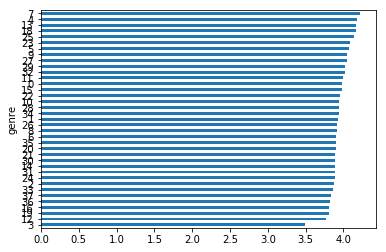

In [129]:
genre_1_books_ratings.groupby('genre').mean()['rating'].sort_values().plot(kind='barh')

In [17]:
highest_rated_in_genre.groupby('genre').mean()

,book_id,rating,count,rank_in_genre
genre,,,,
0,4781.8,4.262344,160.4,3.0
1,6663.8,4.487095,437.8,3.0
2,4197.0,4.221434,333.6,3.0
3,4614.4,4.005507,483.4,3.0
4,5929.8,4.502585,180.6,3.0
5,5071.8,4.496380,206.8,3.0
6,6256.4,4.481380,376.2,3.0
7,6613.0,4.776519,269.8,3.0
8,3741.8,4.251205,924.2,3.0


In [21]:
# generate df with genre number and genre label
genre_number = []
genre = []
genre_number_name_dict = {}
for i,x in enumerate(genres.columns):
    genre_number.append(i)
    genre.append(x)
    genre_number_name_dict[i] =  x
    genre_number_name_dict[x] =  i

    genre_labels = pd.DataFrame({'genre' : genre_number,
 'genre_label' : genre})

# unstack df (turn from wide to long)
genres_long = genres.unstack().reset_index()
genres_long.columns = [['genre_label','book_id','percent']]

# remove zero percent genres
genres_long = genres_long[genres_long.percent > 0]

# add genre id
genres_long['genre_id'] = genres_long.genre_label.apply(lambda x: genre_number_name_dict[x])

In [22]:
def turn_to_genre_weighted(df):    
    df2 = df.merge(genres_long, on='book_id')
    df2['rating_percent'] = df2.rating * df2.percent
    user_genre_total = df2.groupby(['user_id','genre_id']).sum().reset_index()[['user_id','genre_id','percent','rating_percent']]
    user_genre_total['rating'] = user_genre_total.rating_percent / user_genre_total.percent
    
    user_genre_count = df2.groupby(['user_id','genre_id']).count().reset_index()[['user_id','genre_id','percent']]

    df3 = user_genre_total.merge(user_genre_count,on=['user_id','genre_id'])
    df3 = df3[['user_id','genre_id','rating','percent_x','percent_y']]
    df3.columns = [['user_id','genre_id','rating','weight_sum','book_count']]
    
    return df3
# df_test2 = df_test.merge(user_genre_total)

In [23]:
ratings_genre = turn_to_genre_weighted(ratings)

In [24]:
ratings_genre_high = ratings_genre[ratings_genre.weight_sum>=2]
ratings_genre_low = ratings_genre[ratings_genre.weight_sum<2]

In [25]:
def SVD_testset(sample):
    
    result_dict = {}
    
    reader = Reader(rating_scale=(1,5))
    data = Dataset.load_from_df(sample, reader)
    trainset = data.build_full_trainset()
    testset = trainset.build_testset()
    antitestset = trainset.build_anti_testset()
    
    algo = SVD(n_factors =  20, n_epochs = 150, lr_all =  0.0225,
              reg_all =  0.06)
    
    algo.train(trainset)

    # Than predict ratings for all pairs (u, i) that are NOT in the training set.

    predictions = algo.test(testset)
    
    result_dict['RMSE'] = float(accuracy.rmse(predictions, verbose=True))
    result_dict['MAE'] = float(accuracy.mae(predictions, verbose=True))
    
    return algo, predictions, result_dict

In [26]:
algo_high, predictions_high, result_dict_high = SVD_testset(ratings_genre_high[['user_id','genre_id','rating']])

RMSE: 0.2524
MAE:  0.1876


In [29]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings_genre_low[['user_id','genre_id','rating']], reader)
trainset = data.build_full_trainset()
testset = trainset.build_testset()
predictions_for_genre_low = algo_high.test(testset)
RMSE = float(accuracy.rmse(predictions_for_genre_low, verbose=True))
MAE = float(accuracy.mae(predictions_for_genre_low, verbose=True))

RMSE: 0.6493
MAE:  0.4723


In [30]:
# now test using full_genre_low and compare predicted rating for low genre to actual ratings

predictions_low_weights = pd.DataFrame()
user_id = []
item_id = []
predicted_rating = []
actual_rating = []
for i in range(len(predictions_for_genre_low)):
    user_id.append(predictions_for_genre_low[i][0])
    item_id.append(predictions_for_genre_low[i][1])
    actual_rating.append(predictions_for_genre_low[i][2])
    predicted_rating.append(predictions_for_genre_low[i][3])

In [33]:
predictions_low_weights = pd.DataFrame({'user_id' : user_id,\
                                        'genre_id':item_id,'predicted_rating':predicted_rating,\
                                       'actual_rating':actual_rating})                         

(0, 5)

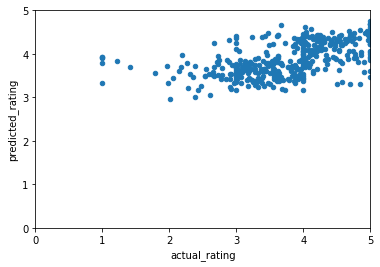

In [35]:
predictions_low_weights[predictions_low_weights.user_id.isin([1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])].plot.scatter(x='actual_rating',y='predicted_rating')
plt.xlim(0, 5)
plt.ylim(0, 5)

In [40]:
predictions_low_weights[['user_id','genre_id','predicted_rating']]

,actual_rating,genre_id,predicted_rating,user_id
0,3.072333,0,3.463176,1
1,4.581733,2,3.354636,1


In [42]:
# merge predicted ratings onto full genre to get a df with actual rating and predicted rating

ratings_genre_pred_low = ratings_genre_low.merge(predictions_low_weights[['user_id','genre_id','predicted_rating']]\
                                                 , on=['genre_id','user_id'])
ratings_genre_pred_low.columns=['user_id','genre_id','rating','weight_sum','book_count','predicted_rating']
ratings_genre_pred_low['prediction_error'] = ratings_genre_pred_low['rating']-ratings_genre_pred_low['predicted_rating']

In [46]:
ratings_genre_pred_low.head(2)

,user_id,genre_id,rating,weight_sum,book_count,predicted_rating,prediction_error
0,1,0,3.072333,0.313890,4,3.463176,-0.390843
1,1,2,4.581733,0.212112,5,3.354636,1.227096


In [49]:
ratings_genre_pred_low[ratings_genre_pred_low.user_id==4].merge(genre_labels,left_on='genre_id',right_on='genre').sort_values('predicted_rating',ascending=False).head(2)

,user_id,genre_id,rating,weight_sum,book_count,predicted_rating,prediction_error,genre,genre_label
12,4,25,4.446947,1.108846,3,4.138077,0.308870,25,Poetry
4,4,7,4.000000,0.103339,1,4.023439,-0.023439,7,Comics


In [88]:
# limit to 2 highest rated genres and create one for each
ratings_genre_pred_low['prediction_rank'] = ratings_genre_pred_low.groupby('user_id')['predicted_rating'].rank(method='first',ascending=False)
ratings_genre_pred_low_first_genre = ratings_genre_pred_low[ratings_genre_pred_low.prediction_rank == 1]
ratings_genre_pred_low_second_genre = ratings_genre_pred_low[ratings_genre_pred_low.prediction_rank == 2]


In [91]:
# merge with highest rated books 
ratings_genre_pred_low_first_genre_books = ratings_genre_pred_low_first_genre.\
                                    merge(highest_rated_in_genre[['genre','book_id']],\
                                    left_on='genre_id',right_on='genre')
    
ratings_genre_pred_low_second_genre_books = ratings_genre_pred_low_second_genre.\
                                    merge(highest_rated_in_genre[['genre','book_id']],\
                                    left_on='genre_id',right_on='genre')

ratings_genre_pred_low_first_genre_books_genre_weights = ratings_genre_pred_low_first_genre_books.merge(genres, left_on='book_id',right_index=True)

ratings_genre_pred_low_second_genre_books_genre_weights = ratings_genre_pred_low_second_genre_books.merge(genres, left_on='book_id',right_index=True)

In [92]:
final_book_pred = pd.DataFrame(columns=['user_id','genre','book_id'])
to_append = []
for user in ratings_genre_pred_low.user_id.unique():
# for user in [1,2,3]:

    user_read_books = ratings[ratings.user_id == user].book_id.values
    
    first = ratings_genre_pred_low_first_genre_books_genre_weights[ratings_genre_pred_low_first_genre_books_genre_weights.user_id==user]
    second = ratings_genre_pred_low_second_genre_books_genre_weights[ratings_genre_pred_low_second_genre_books_genre_weights.user_id==user]
    
    first = first[~first.book_id.isin(user_read_books)]
    second = second[~second.book_id.isin(user_read_books)]
    
    to_append = first.iloc[[0,1]][['user_id','genre','book_id']]
    final_book_pred = pd.concat([final_book_pred,to_append])

    to_append = second.iloc[[0,1]][['user_id','genre','book_id']]
    final_book_pred = pd.concat([final_book_pred,to_append])



In [110]:
final_book_pred2 = final_book_pred.merge(books2,on='book_id')
final_book_pred2 = final_book_pred2.merge(genre_labels,on='genre')
final_book_pred2[['user_id','genre_label','title','authors']].sort_values('user_id')

,user_id,genre_label,title,authors
0,1,Poetry,A Child's Garden of Verses,"Robert Louis Stevenson, Tasha Tudor"
43978,1,Children's,Disney's the Lion King,Don Ferguson
30222,1,Children's,The Day the Crayons Quit,"Drew Daywalt, Oliver Jeffers"
15064,1,Poetry,The Poetry of Pablo Neruda,"Pablo Neruda, Ilan Stavans"
1,2,Poetry,A Child's Garden of Verses,"Robert Louis Stevenson, Tasha Tudor"
43979,2,Children's,Disney's the Lion King,Don Ferguson
30223,2,Children's,The Day the Crayons Quit,"Drew Daywalt, Oliver Jeffers"
15065,2,Poetry,The Poetry of Pablo Neruda,"Pablo Neruda, Ilan Stavans"
57780,3,Comics,The Complete Calvin and Hobbes,Bill Watterson
15066,3,Poetry,The Poetry of Pablo Neruda,"Pablo Neruda, Ilan Stavans"


In [ ]:
final_genre_pred2[['user_id','genre_label','genre_pred_rating','title','authors']].to_csv('genre_diversity_recs2.csv')

In [111]:
final_book_pred2[final_book_pred2.user_id.isin([53425,53426,53427,53428])][['user_id','genre_label','title','authors']].sort_values('user_id')

,user_id,genre_label,title,authors
43975,53425,Children's,The Day the Crayons Quit,"Drew Daywalt, Oliver Jeffers"
57754,53425,Children's,Disney's the Lion King,Don Ferguson
177871,53425,Fantasy,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson
180449,53425,Fantasy,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré"
15062,53426,Poetry,A Child's Garden of Verses,"Robert Louis Stevenson, Tasha Tudor"
30159,53426,Poetry,The Poetry of Pablo Neruda,"Pablo Neruda, Ilan Stavans"
43976,53426,Children's,The Day the Crayons Quit,"Drew Daywalt, Oliver Jeffers"
57755,53426,Children's,Disney's the Lion King,Don Ferguson
43977,53427,Children's,The Day the Crayons Quit,"Drew Daywalt, Oliver Jeffers"
57756,53427,Children's,Disney's the Lion King,Don Ferguson


In [121]:
ratings_genre_high[ratings_genre_high.user_id==53427].merge(genre_labels,left_on='genre_id',right_on='genre').sort_values('rating',ascending=False)

,user_id,genre_id,rating,weight_sum,book_count,genre,genre_label
1,53427,11,4.954496,2.942852,12,11,Fantasy
0,53427,6,4.866562,4.982201,20,6,Classics
2,53427,12,4.753150,5.542019,25,12,Fiction
3,53427,22,4.641547,3.283241,11,22,Nonfiction


In [116]:
ratings_genre_pred_low[ratings_genre_pred_low.user_id==53427].merge(genre_labels,left_on='genre_id',right_on='genre').sort_values('predicted_rating',ascending=False)

,user_id,genre_id,rating,weight_sum,book_count,predicted_rating,prediction_error,prediction_rank,genre,genre_label
3,53427,4,5.000000,0.007540,1,4.901577,0.098423,1.0,4,Children's
8,53427,14,4.923179,1.747232,12,4.822581,0.100597,2.0,14,Historical Fiction
9,53427,15,4.565370,1.520916,16,4.769037,-0.203667,3.0,15,History
15,53427,27,4.813573,0.091203,3,4.752480,0.061093,4.0,27,Religion
17,53427,29,4.333033,1.360715,8,4.751962,-0.418929,5.0,29,Science
4,53427,5,4.000000,0.008456,1,4.749401,-0.749401,6.0,5,Christian
12,53427,21,5.000000,0.147227,5,4.715556,0.284444,7.0,21,Mystery
7,53427,10,5.000000,0.236135,3,4.706560,0.293440,8.0,10,Crime
21,53427,33,4.799798,0.049016,2,4.704745,0.095053,9.0,33,Sports
18,53427,30,4.968110,1.452877,9,4.704453,0.263657,10.0,30,Science Fiction


In [64]:
second.ialoc[[0,1]][['user_id','genre','book_id']]

,user_id,genre,book_id
36960,3,25,5972
36961,3,25,6298


In [70]:
to_append

['user_id',
 'genre',
 'book_id',
 'user_id',
 'genre',
 'book_id',
 'user_id',
 'genre',
 'book_id',
 'user_id',
 'genre',
 'book_id',
 'user_id',
 'genre',
 'book_id',
 'user_id',
 'genre',
 'book_id']

In [57]:
final_book_pred[final_book_pred.genre==3]

,user_id,genre,book_id


In [ ]:
predictions_low_weights.head(2)

In [ ]:
ratings_genre_pred_low.plot.scatter(x='weight_sum',y='rating')